<a href="https://colab.research.google.com/github/yodavo/Learning_ML-DP-GIS/blob/main/2021/2021_12_Statsmodel_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Intro to Statsmodels**

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = sm.datasets.get_rdataset("Guerry", "HistData").data
data.columns

Index(['dept', 'Region', 'Department', 'Crime_pers', 'Crime_prop', 'Literacy',
       'Donations', 'Infants', 'Suicides', 'MainCity', 'Wealth', 'Commerce',
       'Clergy', 'Crime_parents', 'Infanticide', 'Donation_clergy', 'Lottery',
       'Desertion', 'Instruction', 'Prostitutes', 'Distance', 'Area',
       'Pop1831'],
      dtype='object')

## **0.1. Using Rstyle formulas**

In [4]:
# Fit OLS regression use ln
res = smf.ols("Lottery ~ Literacy + np.log(Pop1831)", data = data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.90e-08
Time:                        21:39:12   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

## **0.2 With numpy arrays**

In [5]:
# creating arrays to test on
# coef
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)

# beta
beta = [1,.1,.5] # coef
e = np.random.random(nobs) # error
y = np.dot(X, beta) + e

# modeling
res_2 = sm.OLS(y, X).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     19.63
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           6.96e-08
Time:                        21:39:52   Log-Likelihood:                -19.791
No. Observations:                 100   AIC:                             45.58
Df Residuals:                      97   BIC:                             53.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5589      0.088     17.675      0.0

## **0.3. Directories inside the summary tables**
HUGE HELP

In [6]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


# **1. Getting Started with statsmodels**

In [7]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [12]:
# dataset
df = sm.datasets.get_rdataset("Guerry", "HistData").data

# choose variables
vars = ["Department", "Lottery", "Literacy", "Wealth", "Region"]
df = df[vars]

# missign value cleaning
df = df.dropna()

# review
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  85 non-null     object
 1   Lottery     85 non-null     int64 
 2   Literacy    85 non-null     int64 
 3   Wealth      85 non-null     int64 
 4   Region      85 non-null     object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


**OLS variable** - Ordinary least squeares

$\hat{\beta} = (X'X)^{-1}X'y$

Evertyhing in column matrices!

**Some variables names**
1. Endogeneus variable:
  - Dependent
  - Response
  - Regressand

2. Exogeneus variable:
  - Independent
  - Regressor



## **1.1. Use patsy for create matrices-dataframes**

In [19]:
# Using patsy (dmatrices) to create dataframes ready to be used in models
# This is awesome!!!!
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', 
                 data=df, return_type='dataframe')
X.head()

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0
3,1.0,1.0,0.0,0.0,0.0,46.0,76.0
4,1.0,1.0,0.0,0.0,0.0,69.0,83.0


## **1.2. Describe and fit the model**

In [21]:
# Describe Model
mod = sm.OLS(y, X)

# Fit Model
res = mod.fit()

# Summarize Model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-05
Time:                        22:00:23   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [25]:
print(res.params)
print("=========================")
print(res.rsquared)

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64
0.3379508691928822


## **1.3. Diagnostics and specification test**

In [26]:
# rainow test for linearity
# Null hipotesis = the model is linear
sm.stats.linear_rainbow(res)
# give a tuple (fstats, p-value)

(0.847233997615691, 0.6997965543621644)

In [27]:
print(sm.stats.linear_rainbow.__doc__)

Rainbow test for linearity

    The Null hypothesis is that the regression is correctly modelled as linear.
    The alternative for which the power might be large are convex, check

    Parameters
    ----------
    res : Result instance

    Returns
    -------
    fstat : float
        test statistic based of F test
    pvalue : float
        pvalue of the test

    


## **1.4. Graphs from plot**

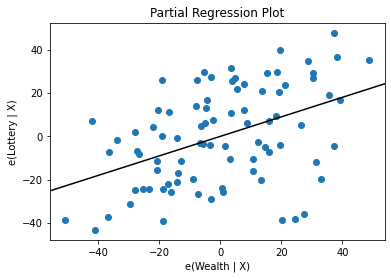

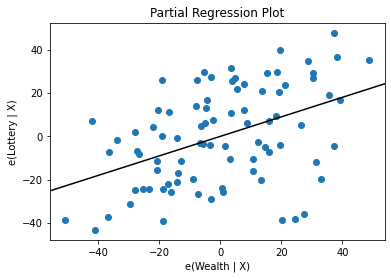

In [28]:
# plot
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                            data=df, obs_labels = False)

# **2. Fitting Models Using R-style Formulas**

In [30]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[["Lottery", "Literacy", "Wealth", "Region"]].dropna() # it does the dummy automatically
res = smf.ols(formula="Lottery ~ Literacy + Wealth + Region", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-05
Time:                        22:04:42   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

## **2.1. Categorical Variables**

In [32]:
# getting categorical variables
df.Region.unique()

array(['E', 'N', 'C', 'S', 'W'], dtype=object)

In [34]:
# To explicitly state Region is categorical
res_c = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region)", data=df).fit()
print(res_c.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-05
Time:                        22:07:33   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.6517      9.456      4.

In [36]:
# To remove variables, removing the constant (intercept)
res_nc = smf.ols(formula="Lottery ~ Literacy + Wealth + C(Region) - 1", data=df).fit()
print(res_nc.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-05
Time:                        22:08:32   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(Region)[C]    38.6517      9.456      4.087   

In [37]:
# Interactions: Matrix (:)
res_int1 = smf.ols(formula="Lottery ~ Literacy:Wealth -1", data=df).fit()
print(res_int1.params)

Literacy:Wealth    0.018176
dtype: float64


In [38]:
# Interactions individual cols (multiplation sign)
res_int2 = smf.ols(formula="Lottery ~ Literacy*Wealth - 1", data=df).fit()
print(res_int2.params)

Literacy           0.427386
Wealth             1.080987
Literacy:Wealth   -0.013609
dtype: float64


In [40]:
# Functions
res = smf.ols(formula="Lottery ~ np.log(Literacy)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           0.000144
Time:                        22:10:38   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          115.6091     18.374  

In [43]:
# applyting other functions
def log_plus_1(x):
    return np.log(x) + 1.

# Functions
res = smf.ols(formula="Lottery ~ log_plus_1(Literacy)", data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           0.000144
Time:                        22:11:25   Log-Likelihood:                -385.38
No. Observations:                  85   AIC:                             774.8
Df Residuals:                      83   BIC:                             779.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              136.0031 

# **3. Ordinary Least Squares**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [48]:
# Fake Data
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)

# set the constant
X = sm.add_constant(X)
y = np.dot(X, beta) + e

# Model fit and Summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.761e+06
Date:                Sat, 18 Dec 2021   Prob (F-statistic):          7.48e-247
Time:                        22:14:04   Log-Likelihood:                -128.56
No. Observations:                 100   AIC:                             263.1
Df Residuals:                      97   BIC:                             270.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3128      0.261      5.024      0.0

In [49]:
# Reviewing results
print("R2: ", res.rsquared )

R2:  0.9999915814713503


## **3.1.OLS non-linear curve but linear in parameters**

In [52]:
# Fake Data 2
nsample = 100
sig = 0.5
x = np.linspace(0,20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) # Adds noise

# model, fit, summary
res_2 = sm.OLS(y, X).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     368.6
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.58e-52
Time:                        22:16:27   Log-Likelihood:                -74.918
No. Observations:                 100   AIC:                             157.8
Df Residuals:                      96   BIC:                             168.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4621      0.020     23.385      0.0

In [54]:
print("Parameters: ", res_2.params, "\n")
print("Std Errors: ", res_2.bse, "\n")
print("Pred Values: ", res_2.predict(), "\n")
print("R Squared", res_2.rsquared)

Parameters:  [ 0.46210331  0.32980863 -0.01732907  5.23915775] 

Std Errors:  [0.01976036 0.07636209 0.00173638 0.12812613] 

Pred Values:  [ 4.80593088  4.9997618   5.18948665  5.3725233   5.54650413  5.70937231
  5.85946547  5.99558334  6.11703652  6.22367453  6.31589197  6.39461244
  6.46125096  6.51765646  6.56603652  6.60886765  6.64879449  6.68852229
  6.73070686  6.77784657  6.83218068  6.89559833  6.96956165  7.05504631
  7.15250185  7.26183336  7.38240538  7.5130677   7.6522022   7.79778861
  7.94748672  8.09873156  8.24883769  8.39510847  8.53494573  8.66595544
  8.78604508  8.89350876  8.9870966   9.06606556  9.13020969  9.17986847
  9.21591303  9.23971069  9.25306938  9.25816408  9.25744838  9.25355463
  9.24918696  9.2470112   9.24954653  9.25906296  9.27748903  9.30633336
  9.34662329  9.3988631   9.46301349  9.53849318  9.62420257  9.71856843
  9.81960791  9.92500922 10.03222558 10.13857889 10.24136862 10.33798162
 10.42599847 10.50329184 10.56811304 10.61916312 10.65564

In [ ]:
# function
def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

# **4. OLS with Dummy Variables**

In [55]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] =1
groups[40:] = 2

# get the dummy values
dummy = pd.get_dummies(groups).values
x = np.linspace(0,20,nsample)
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [59]:
# results
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     722.8
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.09e-38
Time:                        22:24:41   Log-Likelihood:                -63.888
No. Observations:                  50   AIC:                             135.8
Df Residuals:                      46   BIC:                             143.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1339      0.059     19.214      0.0

In [60]:
def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

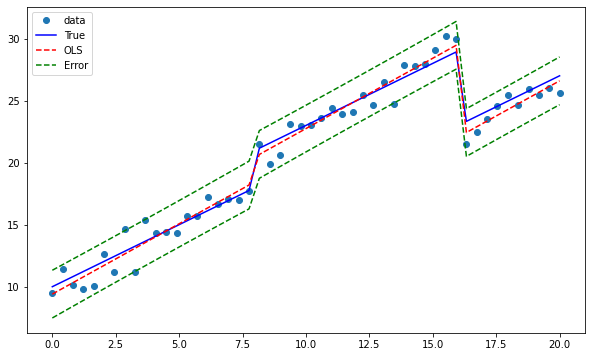

In [61]:
plot_compare(res)

# **5. Generalized Least Squares**




In [62]:
# Longley datasets Time Series
data = sm.datasets.longley.load(as_pandas=False)
data.exog = sm.add_constant(data.exog) # ecogenous variable

**Heteroskedastic**

The absence of homoskedasticity. If there is varabiality of some random distrubance and it is different acrross all the element of the vector. Variability could be variance or any other statistical of dispersion.

* AR(1) Process with trend

$R_{i} = \beta_{0} + ρϵ_{i-1} + \eta_{i} $

where $\eta ~ N0, ϵ^{2}$

In [69]:
# sigma ols_resit
ols_resid = sm.OLS(data.endog, data.exog).fit().resid

# 
resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()

In [70]:
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-1.4390229839839999
0.1737844478852498


In [72]:
rho = resid_fit.params[1]
print(rho)

-0.36342949087910786


In [73]:
from scipy.linalg import toeplitz
toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [78]:
order = toeplitz(range(len(ols_resid)))
print(order)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
 [ 1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [ 2  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [ 3  2  1  0  1  2  3  4  5  6  7  8  9 10 11 12]
 [ 4  3  2  1  0  1  2  3  4  5  6  7  8  9 10 11]
 [ 5  4  3  2  1  0  1  2  3  4  5  6  7  8  9 10]
 [ 6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9]
 [ 7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8]
 [ 8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7]
 [ 9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6]
 [10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5]
 [11 10  9  8  7  6  5  4  3  2  1  0  1  2  3  4]
 [12 11 10  9  8  7  6  5  4  3  2  1  0  1  2  3]
 [13 12 11 10  9  8  7  6  5  4  3  2  1  0  1  2]
 [14 13 12 11 10  9  8  7  6  5  4  3  2  1  0  1]
 [15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]]


In [79]:
sigma = rho**order
gls_model = sm.GLS(data.endog, data.exog, sigma=sigma)

In [80]:
gls_results = gls_model.fit()
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     724.0
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.48e-11
Time:                        22:36:53   Log-Likelihood:                -107.50
No. Observations:                  16   AIC:                             229.0
Df Residuals:                       9   BIC:                             234.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.798e+06   6.71e+05     -5.663      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [82]:
glsar_model = sm.GLSAR(data.endog, data.exog, 1)
glsar_results = glsar_model.iterative_fit(1)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           6.09e-09
Time:                        22:37:35   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.468e+06   8.72e+05     -3.979      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [85]:
print(gls_results.params)
print(glsar_results.params)
print("================================================================")
print(gls_results.bse)
print(glsar_results.bse)

[-3.79785490e+06 -1.27656454e+01 -3.80013250e-02 -2.18694871e+00
 -1.15177649e+00 -6.80535580e-02  1.99395293e+03]
[-3.46796063e+06  3.45567846e+01 -3.43410090e-02 -1.96214395e+00
 -1.00197296e+00 -9.78045986e-02  1.82318289e+03]
[6.70688699e+05 6.94308073e+01 2.62476822e-02 3.82393151e-01
 1.65252692e-01 1.76428334e-01 3.42634628e+02]
[8.71584052e+05 8.47337145e+01 3.28032450e-02 4.80544865e-01
 2.11383871e-01 2.24774369e-01 4.45828748e+02]


# **6. Quantile Regression**

In [86]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


## **6.1. Least Abosulte Deviation**

In [88]:
model = smf.quantreg('foodexp~income', data)
res = model.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Sat, 18 Dec 2021   No. Observations:                  235
Time:                        22:40:25   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


## **6.2. Visualize Results**

In [90]:
quantiles = np.arange(.05, .96, .1)
def fit_models(q):
    res = model.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()

models = [fit_models(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q","a","b","lb","ub"])

ols = smf.ols('foodexp~income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols_dict = dict(a=ols.params['Intercept'],
                b=ols.params['income'], 
                lb = ols_ci[0],
                ub = ols_ci[1])
print(models)
print(ols_dict)

      q           a         b        lb        ub
0  0.05  124.880100  0.343361  0.268632  0.418090
1  0.15  111.693660  0.423708  0.382780  0.464636
2  0.25   95.483539  0.474103  0.439900  0.508306
3  0.35  105.841294  0.488901  0.457759  0.520043
4  0.45   81.083647  0.552428  0.525021  0.579835
5  0.55   89.661370  0.565601  0.540955  0.590247
6  0.65   74.033436  0.604576  0.582169  0.626982
7  0.75   62.396584  0.644014  0.622411  0.665617
8  0.85   52.272216  0.677603  0.657383  0.697823
9  0.95   64.103964  0.709069  0.687831  0.730306
{'a': 147.47538852370573, 'b': 0.48517842367692354, 'lb': 0.4568738130184233, 'ub': 0.5134830343354237}


## **6.3. First Plot**

Best fit line for 10 quantile regression models to the least squares fit.

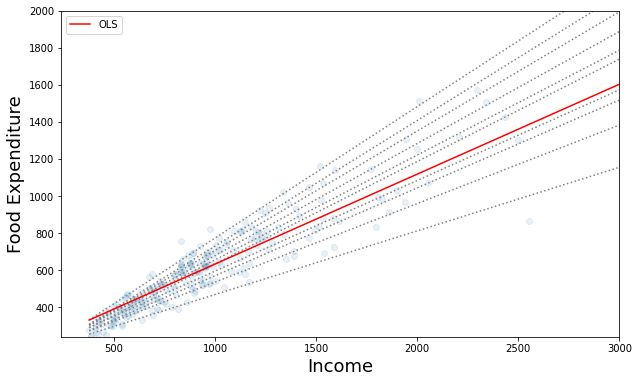

In [91]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(10,6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')
    
y = get_y(ols_dict['a'], ols_dict['b'])

ax.plot(x, y, color="red", label="OLS")
ax.scatter(data.income, data.foodexp, alpha=0.1)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Food Expenditure', fontsize=18);

## **6.4. Second plot**

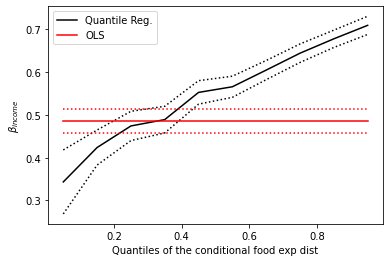

In [93]:
n = models.shape[0]

# QUANTILE REG
p1 = plt.plot(models.q, models.b, color="black", label="Quantile Reg.")
p2 = plt.plot(models.q, models.ub, linestyle="dotted", color="black")
p3 = plt.plot(models.q, models.lb, linestyle="dotted", color="black")

# OLS
p4 = plt.plot(models.q, [ols_dict['b']] * n, color="red", label="OLS")
p5 = plt.plot(models.q, [ols_dict['lb']] * n, color="red", linestyle="dotted")
p6 = plt.plot(models.q, [ols_dict['ub']] * n, color="red", linestyle="dotted")
plt.ylabel(r'$\beta_{income}$')
plt.xlabel("Quantiles of the conditional food exp dist")
plt.legend();

# **7. Recursive Least Squares** Coooper dataset


In [94]:
# Coooper dataset
print(sm.datasets.copper.DESCRLONG)

This data describes the world copper market from 1951 through 1975.  In an
example, in Gill, the outcome variable (of a 2 stage estimation) is the world
consumption of copper for the 25 years.  The explanatory variables are the
world consumption of copper in 1000 metric tons, the constant dollar adjusted
price of copper, the price of a substitute, aluminum, an index of real per
capita income base 1970, an annual measure of manufacturer inventory change,
and a time trend.



In [96]:
# load data
data = sm.datasets.copper.load_pandas().data
data.columns

Index(['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX', 'TIME'],
      dtype='object')

In [97]:
data.index = pd.date_range("1951-01-01", "1975-01-01", freq="AS")
endog = data['WORLDCONSUMPTION']
exog = sm.add_constant(data[['COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX']])

In [100]:
model = sm.RecursiveLS(endog, exog)
res = model.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:       WORLDCONSUMPTION   No. Observations:                   25
Model:                    RecursiveLS   Log Likelihood                -154.720
Date:                Sat, 18 Dec 2021   R-squared:                       0.965
Time:                        23:06:03   AIC                            319.441
Sample:                    01-01-1951   BIC                            325.535
                         - 01-01-1975   HQIC                           321.131
Covariance Type:            nonrobust   Scale                       117717.127
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6562.3719   2378.939     -2.759      0.006   -1.12e+04   -1899.737
COPPERPRICE      -13.8132     15.041     -0.918      0.358     -43.292      15.666
INCOMEINDEX      1.21e+04    763.401

In [101]:
res.recursive_coefficients.filtered[0]

array([ 2.88890087e+00,  4.94795049e+00,  1.55841803e+03,  1.95843327e+03,
       -5.14749579e+04, -4.16894975e+03, -2.25261351e+03, -4.46559085e+02,
       -5.28839795e+03, -6.94231936e+03, -7.84608903e+03, -6.64315121e+03,
       -6.27411015e+03, -7.27201696e+03, -6.31902649e+03, -5.82223929e+03,
       -6.25630903e+03, -6.73740446e+03, -6.47742841e+03, -5.99590747e+03,
       -6.45080678e+03, -6.02292166e+03, -5.25835152e+03, -5.32089136e+03,
       -6.56237193e+03])

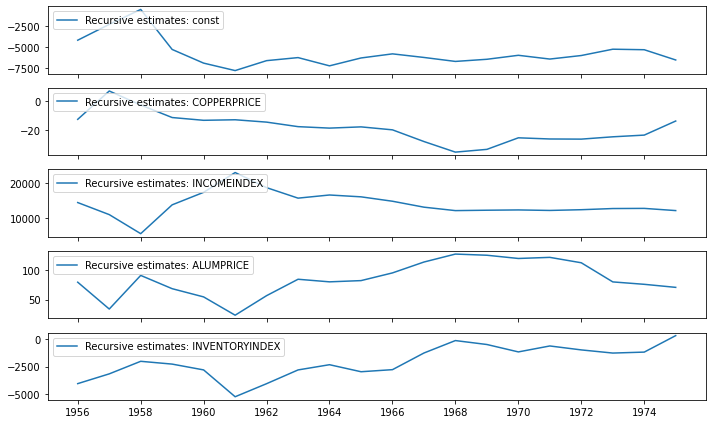

In [103]:
res.plot_recursive_coefficient(range(model.k_exog), alpha=None, figsize=(10,6));

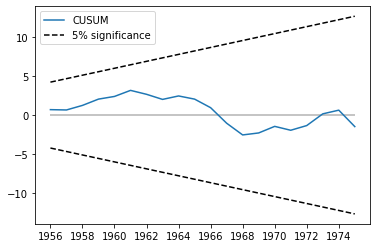

In [104]:
res.plot_cusum();

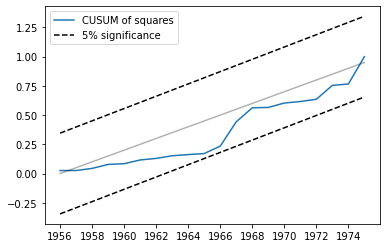

In [105]:
res.plot_cusum_squares();

# **8. Recursive Least Squares** Quantity Theory of Money dataset

In [107]:
from pandas_datareader.data import DataReader

start = '1959-12-01'
end = '2015-01-01'
m2 = DataReader('M2SL', 'fred', start=start, end=end)
cpi = DataReader('CPIAUCSL', 'fred', start=start, end=end)

In [108]:
# Exponentially Weighted Moving Averages
def ewma(series, beta, n_window):
    nobs = len(series)
    scalar = (1 - beta) / (1 + beta)
    ma = []
    k = np.arange(n_window, 0, -1)
    weights = np.r_[beta**k, 1, beta**k[::-1]]
    for t in range(n_window, nobs - n_window):
        window = series.iloc[t - n_window:t + n_window+1].values
        ma.append(scalar * np.sum(weights * window))
    return pd.Series(ma, name=series.name, index=series.iloc[n_window:-n_window].index)

In [109]:
m2_ewma = ewma(np.log(m2['M2SL'].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)
cpi_ewma = ewma(np.log(cpi['CPIAUCSL'].resample("QS").mean()).diff().iloc[1:], 0.95, 10 * 4)

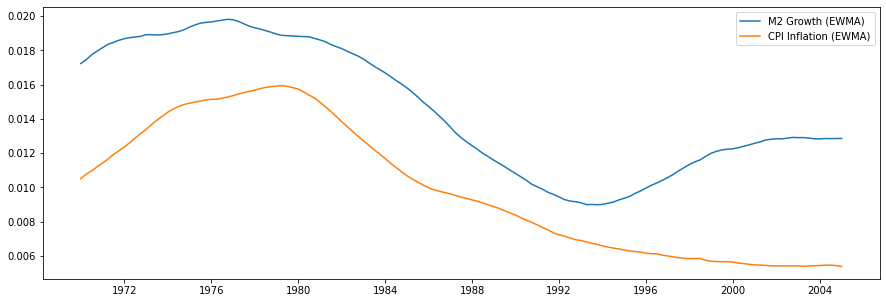

In [110]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(m2_ewma, label = "M2 Growth (EWMA)")
ax.plot(cpi_ewma, label = "CPI Inflation (EWMA)")
ax.legend();

In [111]:
endog = cpi_ewma
exog = sm.add_constant(m2_ewma)
model = sm.RecursiveLS(endog, exog)
res = model.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               CPIAUCSL   No. Observations:                  141
Model:                    RecursiveLS   Log Likelihood                 692.989
Date:                Sat, 18 Dec 2021   R-squared:                       0.814
Time:                        23:15:46   AIC                          -1381.978
Sample:                    01-01-1970   BIC                          -1376.080
                         - 01-01-2005   HQIC                         -1379.581
Covariance Type:            nonrobust   Scale                            0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.001     -6.017      0.000      -0.004      -0.002
M2SL           0.9128      0.037     24.626      0.000       0.840       0.985
Ljung-Box (Q):                     1865.19   Jarque-

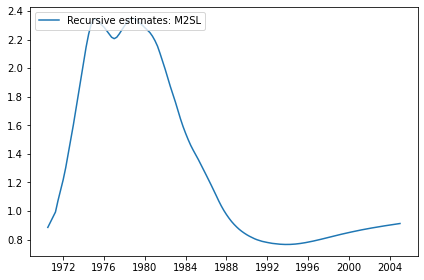

In [112]:
res.plot_recursive_coefficient(1, alpha=None);

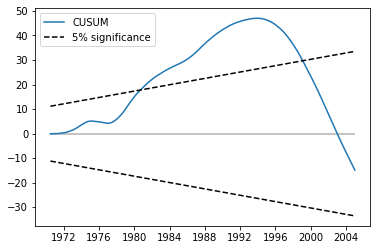

In [113]:
res.plot_cusum();

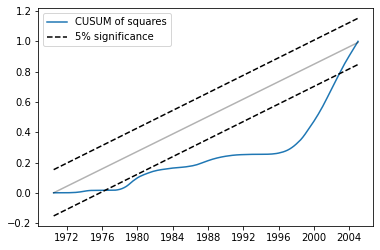

In [114]:
res.plot_cusum_squares();

# **9. Rolling Regression**

## **Logistic regression**

In [25]:
import pandas as pd
import numpy as np

# bankdata = pd.read_excel('https://www3.nd.edu/~busiforc/problems/DataMining/UniversalBank.xls',
#                          sheet_name='Data', header=3)
# bankdata.isnull().sum()

# cleaning
# bankdata.Experience = np.where(bankdata.Experience < 0, 0, bankdata.Experience)
# bankdata.drop(['Zip Code'], axis=1, inplace=True)
# bankdata.set_index(['ID'], inplace=True)
# bankdata = pd.get_dummies(bankdata, columns=['Education'], drop_first=True)
bankdata.rename(columns={'Education_2':'GradDeg', 'Education_3':'AdvDeg'}, inplace=True)

In [30]:
import statsmodels.api as sm
x_inc = sm.add_constant(bankdata['Income'])
y_var = bankdata['Personal Loan']

res = sm.Logit(y_var,x_inc).fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.201623
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                  0.3624
Time:                        01:46:01   Log-Likelihood:                -1008.1
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                3.652e-251
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1273      0.186    -32.926      0.000      -6.492      -5.763
Income         0.0371      0.

In [36]:
type(x_inc)
# value_counts()

pandas.core.frame.DataFrame